In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

import re 
import nltk
nltk.data.path.append("/kaggle/input/nltk-stopwords/nltk_data")
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix


In [2]:
#read and understand the dataset 
dataset = pd.read_csv("/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv")
dataset.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
#Creating a copy of dataset and replacing positive and negative with 1 and 0 respectively
df = dataset.copy()
df["sentiment"] = df["sentiment"].replace(["positive","negative"],[1,0])
df

/tmp/ipykernel_13/3705539495.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["sentiment"] = df["sentiment"].replace(["positive","negative"],[1,0])


,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1
...,...,...
49995,I thought this movie did a down right good job...,1
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",0
49997,I am a Catholic taught in parochial elementary...,0
49998,I'm going to have to disagree with the previou...,0


In [4]:
#intializes an empty list to store cleaned reviews
cleaned_reviews = [] 

#Loads stop_words and initializes PorterStemmer
stop_words = set(stopwords.words("english"))
stop_words.remove("not")
ps = PorterStemmer()

#Loops through first 10000 reviews: regex cleaning, tokenization, removing stopwords, and stemming  
for i in range(0, 10000):
    review = re.sub('[^a-zA-Z]', ' ', df["review"][i])
    review = review.lower().split()
    review = [ps.stem(word) for word in review if not word in stop_words]
    review = ' '.join(review)
    cleaned_reviews.append(review)

In [5]:
#Converts list of Reviews into Bag-of-Words representation
cv = CountVectorizer(max_features = 34920)
X = cv.fit_transform(cleaned_reviews).toarray()
y = df.iloc[:10000, -1].values


In [6]:
#Splitting training and test data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [7]:
#Training Logistic Regression Model
classifier = LogisticRegression(max_iter = 1000)
classifier.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [8]:
#Calculating final accuracy score and displaying confusion matrix results
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[839 157]
 [127 877]]


0.858

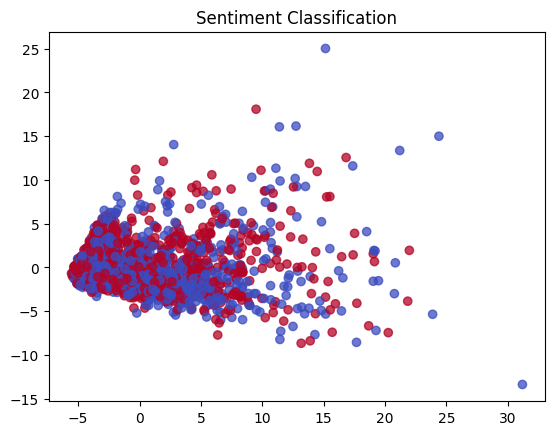

In [9]:
#Visualizing data using Principal Component Analysis
pca = PCA(n_components = 2)
X_test_simplified = pca.fit_transform(X_test)

plt.scatter(X_test_simplified[:,0],X_test_simplified[:,1], c = y_pred, cmap = "coolwarm", alpha = 0.75)
plt.title("Sentiment Classification")
plt.show()
